# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [4]:
#  1. Get the total rides for each city type
Rural_rides_total = sum(pyber_data_df["type"]=="Rural")
Suburban_rides_total = sum(pyber_data_df["type"]=="Suburban")
Urban_rides_total = sum(pyber_data_df["type"]=="Urban")

In [5]:
# 2. Get the total drivers for each city type
Rural_drivers_total = city_data_df[(city_data_df["type"]=="Rural")].sum()["driver_count"]
Suburban_drivers_total = city_data_df[(city_data_df["type"]=="Suburban")].sum()["driver_count"]
Urban_drivers_total = city_data_df[(city_data_df["type"]=="Urban")].sum()["driver_count"]

In [6]:
#  3. Get the total amount of fares for each city type
Rural_fare_total = pyber_data_df[(pyber_data_df["type"]=="Rural")].sum()["fare"]
Suburban_fare_total = pyber_data_df[(pyber_data_df["type"]=="Suburban")].sum()["fare"]
Urban_fare_total = pyber_data_df[(pyber_data_df["type"]=="Urban")].sum()["fare"]

In [7]:
#  4. Get the average fare per ride for each city type. 
fare_per_rural = Rural_fare_total/Rural_rides_total
fare_per_suburban = Suburban_fare_total/Suburban_rides_total
fare_per_urban = Urban_fare_total/Urban_rides_total

In [8]:
# 5. Get the average fare per driver for each city type. 
per_driver_rural = Rural_fare_total/Rural_drivers_total
per_driver_suburban = Suburban_fare_total/Suburban_drivers_total
per_driver_urban = Urban_fare_total/Urban_drivers_total

In [9]:
#  6. Create a PyBer summary DataFrame.
city_types = city_data_df["type"].unique()
total_rides = [Rural_rides_total, Suburban_rides_total, Urban_rides_total]
total_drivers = [Rural_drivers_total, Suburban_drivers_total, Urban_drivers_total]
total_fares = [Rural_fare_total, Suburban_fare_total, Urban_fare_total]
average_per_type = [fare_per_rural, fare_per_suburban, fare_per_urban]
average_per_driver = [per_driver_rural, per_driver_suburban, per_driver_urban]

pyber_summary_df = pd.DataFrame({
    "City Type": city_types,
    "Total Rides": total_rides, 
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": average_per_type,
    "Average Fare per Driver": average_per_driver
    #"Total Drivers": Rural_drivers_total
})


pyber_summary_df = pyber_summary_df.set_index(["City Type"])
pyber_summary_df.head()


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
City Type,,,,,
Urban,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Rural,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Urban,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Rural,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Urban,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Rural,1625,2405,"$39,854.38",$24.53,$16.57


In [46]:
plt.savefig('PyBer_SUmmary_per_City_Tupe.png')

<Figure size 432x288 with 0 Axes>

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# Print the merged DataFrame for reference.
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [13]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

pyber_weekly_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
pyber_weekly_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [14]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_weekly_df = pyber_weekly_df.reset_index()
pyber_weekly_df.head(10)


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
5,Rural,2019-01-08 06:19:45,19.39
6,Rural,2019-01-09 15:30:35,31.84
7,Rural,2019-01-11 04:39:27,16.42
8,Rural,2019-01-14 07:09:17,18.05
9,Rural,2019-01-14 15:58:48,54.10


In [15]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_weekly_pivot_df = pyber_weekly_df.pivot(index='date', columns='type', values='fare')
pyber_weekly_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [16]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

new_pyber_df = pyber_weekly_pivot_df.loc['2019-01-01':'2019-04-29',:]
new_pyber_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [17]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_pyber_df.index = pd.to_datetime(new_pyber_df.index)

In [18]:
# 6. Check that the datatype for the index is datetime using df.info()
new_pyber_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [19]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new_pyber_week_df = new_pyber_df.resample('W').sum()
new_pyber_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<AxesSubplot:xlabel='date'>

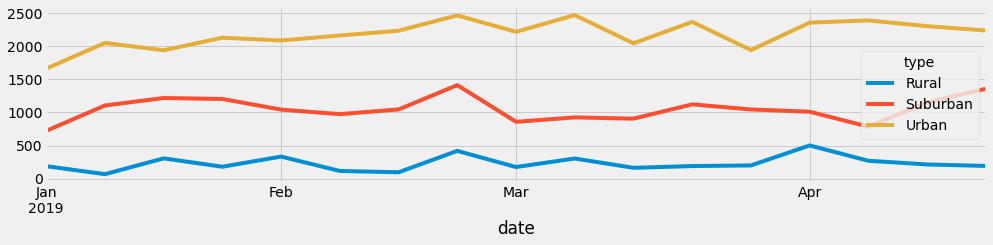

In [41]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

new_pyber_week_df.plot(figsize = (15, 3))


In [45]:
plt.savefig("Total_Fare_by_City_Type")

<Figure size 432x288 with 0 Axes>